# Velika domača naloga: Delež maščob
### Uvod v odkrivanje znanj iz podatkov
Nika Čelan in Aleks Stepančič

In [45]:
import numpy as np
import pandas as pd
import math


In [46]:
dataFrame = pd.read_csv("data/bodyfat.csv")

print(dataFrame.head(5))
print(dataFrame.info())


   body fat [%]  age [yr]  weight [kg]  height [cm]  neck [cm]  chest [cm]  \
0          12.6        23         70.0        172.1       36.2        93.1   
1           6.9        22         78.6        183.5       38.5        93.6   
2          24.6        22         69.9        168.3       34.0        95.8   
3          10.9        26         83.8        183.5       37.4       101.8   
4          27.8        24         83.6        181.0       34.4        97.3   

   abdomen [cm]  hip [cm]  tight [cm]  knee [cm]  ankle [cm]  biceps [cm]  \
0          85.2      94.5        59.0       37.3        21.9         32.0   
1          83.0      98.7        58.7       37.3        23.4         30.5   
2          87.9      99.2        59.6       38.9        24.0         28.8   
3          86.4     101.2        60.1       37.3        22.8         32.4   
4         100.0     101.9        63.2       42.2        24.0         32.2   

   forearm [cm]  wrist [cm]  
0          27.4        17.1  
1       

S ciljno spremenljivko bodyfat sta najbolj korelirani značilki abdomen and chest. To nas ne preseneča saj se predvsem pri moških maščoba nabira predvsem na trebuhu.
Mogoče bi bilo smiselno dodati razmerje med višino in težo

Body fat percentage (BFP) formula for males:

$$BFP = \frac{495}{1.0324 - 0.19077 \cdot log_10 (waist-neck) + 0.15456 \cdot log_10(height)} - 450$$

In [55]:
# dodamo znacilke: razmerje med visino in tezo, indeks telesne mase in delez mascob izracunan po formuli

height_weight_ratio = (dataFrame.loc[: ,"height [cm]"]) / (dataFrame.loc[: ,"weight [kg]"])
dataFrame["height weight ratio"] = height_weight_ratio

ITM = (dataFrame.loc[: ,"weight [kg]"]) / ((dataFrame.loc[: ,"height [cm]"]) * 100)**2
dataFrame["ITM"] = ITM

calculated_bodyfat_percentage = (495/(1.0324 - 0.19077 * np.log10(dataFrame.loc[: ,"abdomen [cm]"] - dataFrame.loc[: ,"neck [cm]"]) + 0.15456 * np.log10(dataFrame.loc[: ,"height [cm]"]))) - 450
dataFrame["calculated_bodyfat_percentage"] = calculated_bodyfat_percentage

#podatke normaliziramo:
normalized_df=(dataFrame-dataFrame.min())/(dataFrame.max()-dataFrame.min())
normalized_df.loc[:, dataFrame.columns[0]] = dataFrame.loc[:, dataFrame.columns[0]]


In [49]:
dataFrame.corr()

,body fat [%],age [yr],weight [kg],height [cm],neck [cm],chest [cm],abdomen [cm],hip [cm],tight [cm],knee [cm],ankle [cm],biceps [cm],forearm [cm],wrist [cm],height weight ratio,ITM,calculated_bodyfat_percentage
body fat [%],1.000000,0.289174,0.613160,-0.089141,0.491489,0.702885,0.813706,0.625700,0.561284,0.507786,0.266783,0.493031,0.363277,0.347573,-0.702021,0.371519,0.829082
age [yr],0.289174,1.000000,-0.012806,-0.171769,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531,-0.051634,0.039847,0.278548
weight [kg],0.613160,-0.012806,1.000000,0.308021,0.830717,0.894157,0.887981,0.940843,0.868712,0.853146,0.613598,0.800441,0.630096,0.729800,-0.926351,0.390390,0.705875
height [cm],-0.089141,-0.171769,0.308021,1.000000,0.253420,0.134691,0.087598,0.170064,0.148105,0.285907,0.264681,0.207558,0.228614,0.321995,-0.024188,-0.638302,-0.275639
neck [cm],0.491489,0.113505,0.830717,0.253420,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826,-0.779035,0.266072,0.519820
chest [cm],0.702885,0.176450,0.894157,0.134691,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162,-0.894016,0.383051,0.793899
abdomen [cm],0.813706,0.230409,0.887981,0.087598,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832,-0.892213,0.414639,0.911052
hip [cm],0.625700,-0.050332,0.940843,0.170064,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090,-0.900009,0.461758,0.752596
tight [cm],0.561284,-0.200096,0.868712,0.148105,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685,-0.856295,0.432555,0.657549
knee [cm],0.507786,0.017516,0.853146,0.285907,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507,-0.809497,0.363876,0.600161


## Preizkus linearne regresije in odkrivanje outlierjev

Vidimo, da se v enem izmed foldov, ko je ta test set zgodi velika napaka, to je primerek 41, ki ga potem izbrišem



[5.67270088e+04 4.89447163e+01 4.48923113e+01 4.35643057e+01
 4.21092452e+01 3.98612214e+01 3.82219418e+01 3.61703759e+01
 3.61542366e+01 3.25332776e+01]
[41 19 22 11 32 27  2 23  8 24]


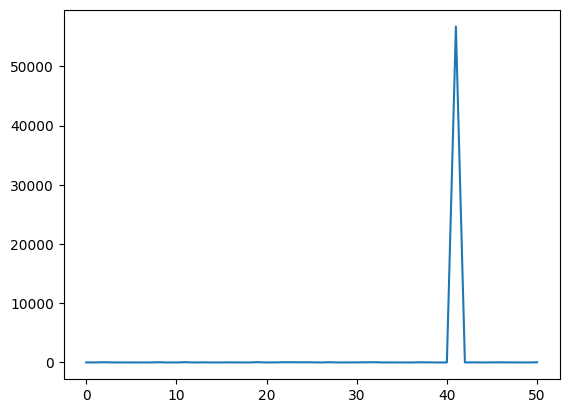

In [56]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
col =normalized_df.columns
X = np.array(normalized_df.loc[:, normalized_df.columns != col[0]])
Y = np.array(normalized_df.loc[:, normalized_df.columns == col[0]])


regr = LinearRegression()
kf = KFold(n_splits=5)

scores = cross_val_score(regr, X, Y, cv=kf)
smallestSplit = np.argsort(scores)[0]
brokenSplitTrain, brokenSplitTest = list(kf.split(X))[smallestSplit]

regr.fit(X[brokenSplitTrain], Y[brokenSplitTrain])
# regr.score(X, Y)
Yp = regr.predict(X[brokenSplitTest])
err = ((Y[brokenSplitTest] - Yp)**2).ravel()
errInd = np.argsort(err)[::-1]
print(err[errInd][:10])
print(errInd[:10])
error = np.sort(err, axis=0)
plt.plot(err)




## Vložitev v 2D prostor s t-SNE
Zanima nas, če se pojavijo posebne oblike ki bi jih lahko izkoristili, ampak ne vidiva nič pametnega

[]

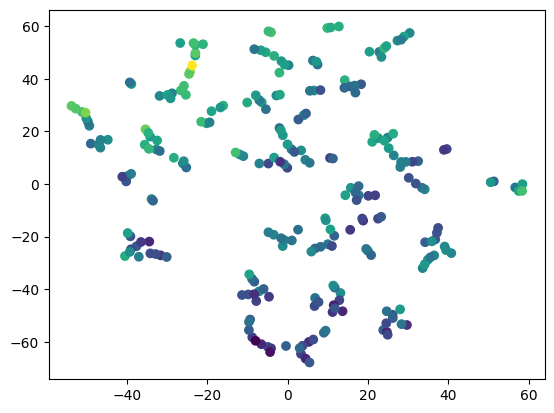

In [63]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:,1], c=Y)
plt.plot()


## Projekcija v 2d prostor s PCAjem

Vizualizirali smo projekcije na prvi 2 komponenti, nato kako so featurju prisotni v prvih treh komponentah in kumulativen graf kako komponente vplivajo na explained variance.

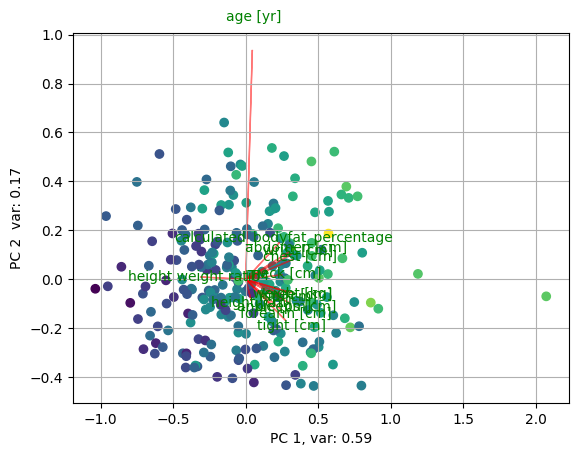

[ 0.04495097  0.27830099  0.03564564  0.24683657  0.32460623  0.29874115
  0.25185373  0.27235382  0.310374    0.16957765  0.30135813  0.24301631
  0.31374779 -0.30911627  0.06820194  0.22913399] [ 0.93267396 -0.05151292 -0.08294574  0.01874497  0.08104709  0.11216827
 -0.06231225 -0.16616375 -0.05350436 -0.09827153 -0.0961565  -0.12293837
  0.10264489  0.00971151  0.01279476  0.14804345]


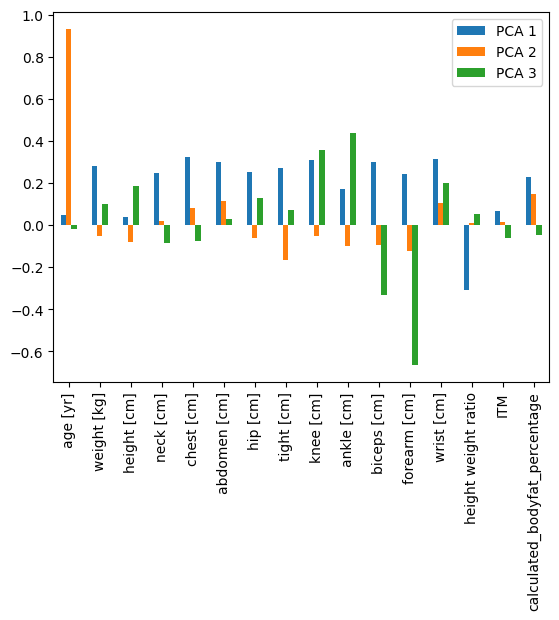

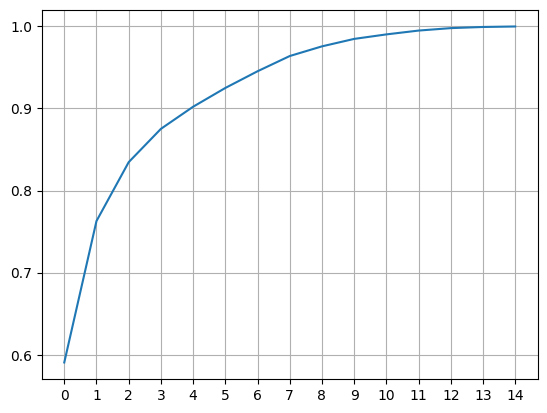

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X = np.array(normalized_df.loc[:, normalized_df.columns != col[0]])
Y = np.array(normalized_df.loc[:, normalized_df.columns == col[0]])
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:, 0], X_pca[:,1], c=Y)
# plt.title("PCA")
# plt.annotate("41", (X_pca[41, 0], X_pca[41,1]))
# plt.plot()

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = Y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

#Call the function. Use only the 2 PCs.
plt.xlabel(f"PC 1, var: {pca.explained_variance_ratio_[0]:.02}")
plt.ylabel(f"PC 2  var: {pca.explained_variance_ratio_[1]:.02}")
plt.grid()
#Call the function. 
myplot(X_pca[:,0:2], pca.components_.T, labels=normalized_df.columns[1:]) 
plt.show()
print(pca.components_[0], pca.components_[1])
column_values = normalized_df.columns[1:]

df_for_plot = pd.DataFrame({"PCA 1": pca.components_[0],"PCA 2":pca.components_[1], "PCA 3": pca.components_[3] }, index=column_values)
df_for_plot.plot.bar()
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(visible=True)
plt.xticks(np.arange(0,15))
plt.show()


## Odstranjevanje outlierjev in Linearna regresija brez regularizacije 

In [60]:
from sklearn.model_selection import RepeatedKFold
cleaned = normalized_df.drop([41,0], axis=0)
cleanOrig = dataFrame.drop([41, 0], axis=0)
X = np.array(cleaned.loc[:, cleaned.columns != col[0]])
Y = np.array(cleaned.loc[:, cleaned.columns == col[0]])
Xorig = np.array(cleanOrig.loc[:, cleanOrig.columns != col[0]])
Yorig = np.array(cleanOrig.loc[:, cleanOrig.columns == col[0]])

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)
#X = np.array(normalized_df).reshape(-1, 1)
# y = np.array(df_binary['Temp']).reshape(-1, 1)
regr = LinearRegression()
score = cross_val_score(regr, X, Y, cv=cv)
print("Average R^2:", np.average(score))
print("Std R^2:", np.std(score))
score = cross_val_score(regr, X, Y, cv=cv, scoring="neg_root_mean_squared_error")
print("Average RMSE:", np.average(score))
print("Std RMSE:", np.std(score))



Average R^2: 0.7107939341381526
Std R^2: 0.020264403449523172
Average RMSE: -4.078736087345355
Std RMSE: 0.34442377719198797


## Linearna regresija z normaliziranimi podatki z Elastic Net regularizacijo

Alpha 0.001
L1 ratio 0.8109999999999998
Average R^2: 0.7191521778685415
Std R^2: 0.017360465792697077
[15  5 13  1 12  6  4  0 11  2  7 10  8  3  9 14]
Average coef: [ 3.08609069e+01  2.60575465e+01 -1.92546484e+01 -1.06582411e+01
 -9.28774149e+00 -8.31074932e+00 -5.98819019e+00  3.87797112e+00
  3.47713211e+00  3.07774257e+00  2.97817343e+00  1.63156287e+00
 -1.38136767e+00 -1.23204330e+00  7.61300243e-01 -8.16894410e-04]
Std coef: [2.09459735 2.00418696 3.80834675 6.42703197 1.13954577 2.21556892
 2.6283094  0.79868381 1.49372849 3.04891682 3.10609532 1.77987592
 1.28557796 2.12751217 2.0050931  0.27771479]


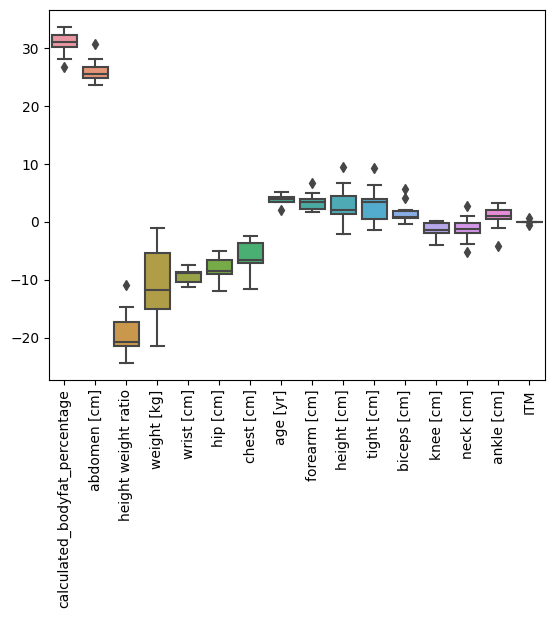

In [61]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import cross_val_score, cross_validate
# define model
ratios = np.arange(0.001, 1, 0.01)
alphas = [0.0001, 0.001,0.01, 0.1, 1.0, 10]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, max_iter=50000)
model.fit(X, Y.ravel())
print("Alpha", model.alpha_)
print("L1 ratio", model.l1_ratio_)
model = ElasticNet(l1_ratio=model.l1_ratio_, alpha=model.alpha_)
score = cross_val_score(model, X, Y.ravel(), cv=cv)
print("Average R^2:", np.average(score))
print("Std R^2:", np.std(score))
cv_results = cross_validate(model, X, Y.ravel(), cv=cv, return_estimator=True)
coefs = np.zeros((10, len(cv_results["estimator"][0].coef_)))
for i in range(10):
    coefs[i, :] = cv_results["estimator"][i].coef_
ind = np.argsort(np.abs(np.average(coefs, axis=0)))[::-1]
print(ind)
avg_coef = np.average(coefs[:,ind], axis=0)
print("Average coef:", avg_coef)
print("Std coef:", np.std(coefs[:, ind], axis=0))
dataf = pd.DataFrame(coefs[:, ind], columns=(normalized_df.columns[1:])[ind])
sns.boxplot(data=dataf)
ax = plt.gca()
a = ax.get_xticklabels()
plt.setp(a, rotation=90)
plt.show()

## Linearna regresija brez normaliziranih podatkov z Elastic Net regularizacijo
Koeficienti povejo za koliko se predvidom poveča/zmanjša procent bodyfat na enoto atributa

Alpha 0.0005
L1 ratio 0.9909999999999999
Average RMSE: -4.036244097858227
Std RMSE: 0.3227653083902051
Average coef: [ 11.9417378   50.32203479 -29.51457596 -27.56573582  -9.36096587
  -9.79807296  -7.53060728   3.54735168   3.03309635   4.95613591
   3.45995748   2.30498142  -1.45065754  -5.54394349   1.21968402
   2.51806594]
Std coef: [ 7.83892331  7.58466009  4.06401763 10.7470046   1.14308323  3.65294637
  3.42736451  0.88124659  1.56732243  4.66892428  3.6008731   2.10149334
  1.54384955  3.56106982  2.23330342  7.55419782]


c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+00, tolerance: 1.256e+00
  model = cd_fast.enet_coordinate_descent(
c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.342e+00, tolerance: 1.274e+00
  model = cd_fast.enet_coordinate_descent(
c:\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+00, tolerance: 1.256e+00
  model = cd_fast.enet_coo

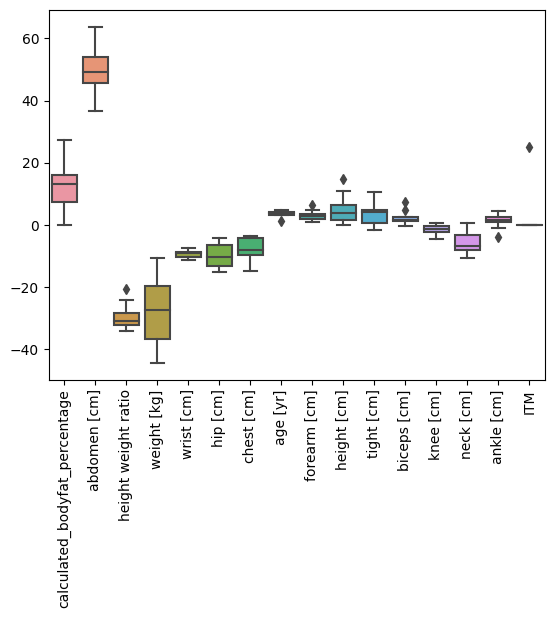

[[2.30000000e+01 7.00000000e+01 1.72100000e+02 ... 2.45857143e+00
  2.36339493e-07 1.89615722e+01]
 [2.20000000e+01 7.86000000e+01 1.83500000e+02 ... 2.33460560e+00
  2.33426635e-07 1.35656367e+01]
 [2.20000000e+01 6.99000000e+01 1.68300000e+02 ... 2.40772532e+00
  2.46779423e-07 2.31732865e+01]
 ...
 [7.20000000e+01 8.47000000e+01 1.67600000e+02 ... 1.97874852e+00
  3.01533370e-07 3.47367120e+01]
 [7.20000000e+01 8.65000000e+01 1.79100000e+02 ... 2.07052023e+00
  2.69665219e-07 2.68000236e+01]
 [7.40000000e+01 9.41000000e+01 1.77800000e+02 ... 1.88947928e+00
  2.97663861e-07 3.01498990e+01]]


In [62]:
ratios = np.arange(0.001, 1, 0.01)
alphas = [0.0005, 0.001,0.01, 0.1, 1.0, 10, 100]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, max_iter=200000)
model.fit(Xorig, Yorig.ravel())
print("Alpha", model.alpha_)
print("L1 ratio", model.l1_ratio_)
model = ElasticNet(l1_ratio=model.l1_ratio_, alpha=model.alpha_)
score = cross_val_score(model, X, Y.ravel(), cv=cv, scoring="neg_root_mean_squared_error")
print("Average RMSE:", np.average(score))
print("Std RMSE:", np.std(score))
cv_results = cross_validate(model, X, Y.ravel(), cv=cv, return_estimator=True)
coefs = np.zeros((10, len(cv_results["estimator"][0].coef_)))
for i in range(10):
    coefs[i, :] = cv_results["estimator"][i].coef_
avg_coef = np.average(coefs[:,ind], axis=0)
print("Average coef:", avg_coef)
print("Std coef:", np.std(coefs[:, ind], axis=0))
dataf = pd.DataFrame(coefs[:, ind], columns=(normalized_df.columns[1:])[ind])
sns.boxplot(data=dataf)
ax = plt.gca()
a = ax.get_xticklabels()
plt.setp(a, rotation=90)
plt.show()

## Random forest s feature importance

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X, Y.ravel())

# model = RandomForestRegressor(n_estimators=100, max_depth=90)
# score = cross_val_score(model, X, Y.ravel(), cv=cv)
# print(score)
# avg = np.average(score)
# std = np.std(score)
# print(avg, std)



Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

Average R^2: 0.6659342817322724
Std R^2: 0.04791469321788357
Average RMSE: -4.402252161562538
Std RMSE: 0.46943326845005745


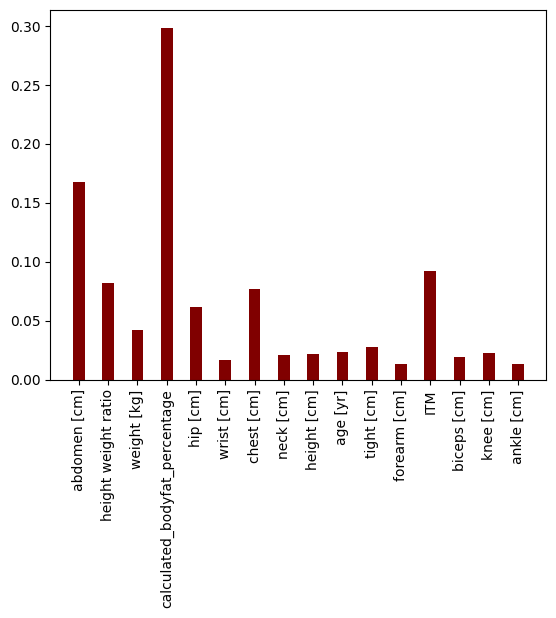

In [ ]:
model = grid_search.best_estimator_
score = cross_val_score(model, X, Y.ravel(), cv=cv)
print("Average R^2:", np.average(score))
print("Std R^2:", np.std(score))
score = cross_val_score(model, X, Y.ravel(), cv=cv, scoring="neg_root_mean_squared_error")
print("Average RMSE:", np.average(score))
print("Std RMSE:", np.std(score))
importance = model.feature_importances_
imp_sort = importance[ind]
plt.bar((normalized_df.columns[1:])[ind], imp_sort, color ='maroon', width = 0.4)
ax = plt.gca()
a = ax.get_xticklabels()
plt.setp(a, rotation=90)
plt.show()

In [ ]:
data = np.array([(np.array(normalized_df.corr().iloc[:,0])[1:])[ind], imp_sort, avg_coef])
column_values = normalized_df.columns[1:][ind]
df = pd.DataFrame(data = data, 
                  index=["Correlation coefficient", "RF feature importance", "Linear regression coefficient"],
                  columns = column_values)
df

,abdomen [cm],calculated_bodyfat_percentage,height weight ratio,ITM,weight [kg],wrist [cm],hip [cm],chest [cm],tight [cm],age [yr],forearm [cm],height [cm],knee [cm],biceps [cm],neck [cm],ankle [cm]
Correlation coefficient,0.813706,0.829082,-0.702021,0.371519,0.613160,0.347573,0.625700,0.702885,0.561284,0.289174,0.363277,-0.089141,0.507786,0.493031,0.491489,0.266783
RF feature importance,0.167908,0.298734,0.082117,0.091738,0.042262,0.016591,0.061136,0.077027,0.027932,0.023267,0.013473,0.021895,0.022326,0.019520,0.020929,0.013145
Linear regression coefficient,0.741223,0.593839,-0.502916,-0.378418,-0.336941,-0.209737,-0.194236,-0.137827,0.083520,0.083217,0.077432,0.072248,-0.045421,0.043399,-0.038725,0.028105


## Grid search pri iskanju najboljšega k-ja pri KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': np.arange(1, 30)    
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)
grid_search.fit(X, Y)
model = grid_search.best_estimator_
score = cross_val_score(model, X, Y.ravel(), cv=cv)
print("Average R^2:", np.average(score))
print("Std R^2:", np.std(score))
score = cross_val_score(model, X, Y.ravel(), cv=cv, scoring="neg_root_mean_squared_error")
print("Average RMSE:", np.average(score))
print("Std RMSE:", np.std(score))
print(model)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
Average R^2: 0.6163981685456446
Std R^2: 0.05146511035134336
Average RMSE: -4.71089285168379
Std RMSE: 0.6636897328396629
KNeighborsRegressor(n_neighbors=13)
